<a href="https://colab.research.google.com/github/Akshith213/Technocolabs/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/test (1).csv')
labels=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/test_labels.csv')
sample=pd.read_csv('/content/gdrive/MyDrive/Technocolabs/Mini project/sample_submission.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
for i in ['toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate']:
  print('Value count of '+i+': '+str(train[train[i]==1].shape[0]))

Value count of toxic: 15294
Value count of severe_toxic: 1595
Value count of obscene: 8449
Value count of threat: 478
Value count of insult: 7877
Value count of identity_hate: 1405


In [9]:
df_corr=train.corr()

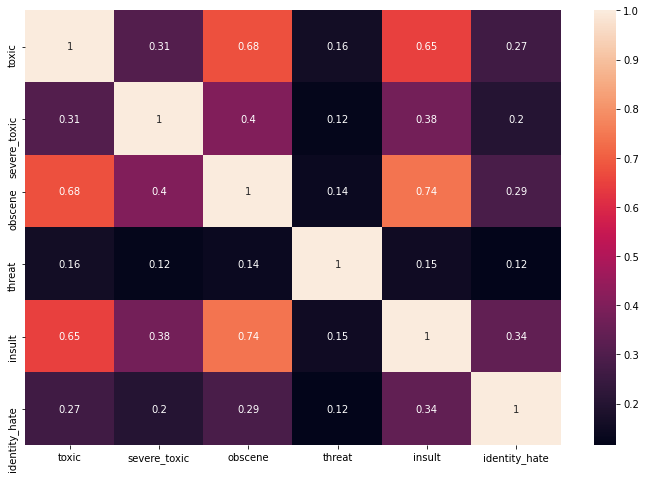

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

In [11]:
print('Number of characters in the longest text: ',len(train['comment_text'].max()))
print('Number of characters in the shortest text: ',len(train['comment_text'].min()))


Number of characters in the longest text:  4521
Number of characters in the shortest text:  36


In [12]:
length=[]
for i in range(train.shape[0]):
  length.append(len(train['comment_text'][i]))

<Figure size 864x576 with 0 Axes>

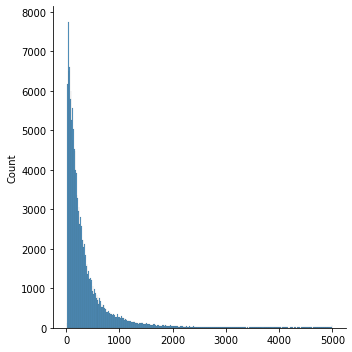

In [13]:
plt.figure(figsize=(12,8))
sns.displot(length)
plt.show()

In [15]:
! pip install fasttext

     |████████████████████████████████| 71kB 4.7MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3044284 sha256=0f4d64cc8b0243b79e946f2e529237c955e837991e919056936504d15f2b0aeb
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [41]:
X_train = train["comment_text"].fillna("fillna").values
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test["comment_text"].fillna("fillna").values

In [42]:
X_train.shape

(159571,)

In [43]:
X_test.shape

(153164,)

In [21]:
max_features = 30000
maxlen = 100
embed_size = 300

In [22]:
from keras.preprocessing import text, sequence

In [23]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [31]:
x_train.shape

(159571, 100)

In [32]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,   733,
          78,     1,   140,   131,   182,    30,   712,  4438, 10282,
        1251,    86,   368,    51,  2230, 14038,    49,  6744,    15,
          60,  2624,   151,     7,  2832,    33,   115,  1246, 16128,
        2517,     5,    50,    59,   256,     1,   370,    31,     1,
          46,    29,   144,    72,  3931,    89,  4209,  6368,  2687,
        1183], dtype=int32)

In [ ]:
tokenizer.word_index

In [35]:
from gensim.models.fasttext import FastText

In [39]:
from gensim.models.fasttext import load_facebook_vectors
model = load_facebook_vectors('wiki.simple')

print(model.most_similar('teacher'))
# Output = [('headteacher', 0.8075869083404541), ('schoolteacher', 0.7955552339553833), ('teachers', 0.733420729637146), ('teaches', 0.6839243173599243), ('meacher', 0.6825737357139587), ('teach', 0.6285147070884705), ('taught', 0.6244685649871826), ('teaching', 0.6199781894683838), ('schoolmaster', 0.6037642955780029), ('lessons', 0.5812176465988159)]

print(model.similarity('teacher', 'teaches'))
# Output = 0.683924396754

ImportError: ignored

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [45]:
train['comment_text_split']=train['comment_text'].apply(lambda x:x.split(' '))

In [46]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_split
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[Explanation\nWhy, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[D'aww!, He, matches, this, background, colour..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[Hey, man,, I'm, really, not, trying, to, edit..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[""\nMore\nI, can't, make, any, real, suggestio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[You,, sir,, are, my, hero., Any, chance, you,..."
